# Análisis exploratorio sobre el calentamiento global

## Vamos a explorar cuál es el comportamiento de la temperatura de diferentes países

**Nota:** Este proyecto se basa en el conocimiento adquirido a través de la clase de [_Desarrollo de Proyectos I_](https://github.com/vcuspinera/UDG_MCD_Project_Dev_I) del programa de la Maestría en Ciencia de Datos de la Universidad de Guadalajara en conjunto con los aprendizajes adquiridos en el curso de [_Spatial Analysis & Geospatial Data Science in Python_](https://www.udemy.com/course/spatial-data-science-in-python/) (Udemy) que cursé hace unos años para aprender a mapear bases de datos en Python.

El EDA es una herramienta de análisis para una revisión iterativa de las bases de datos con la cual describimos las principales características usando estadística descriptiva y visualización de datos.
Contenido:

1. Descripción de los datos
2. Limpieza de datos
    * Missing values (`NA`)
3. Visualización de datos
4. Referencias


## 1. Descripción de los datos

Para este trabajo se utilizaros varios conjuntos de datos los cuales proporcionan una interesante perspectiva sobre las tendencias de temperatura en todo el mundo a lo largo de los años. Con una amplia gama de mediciones de temperatura de diferentes países, estos conjuntos de datos represntan una fuente de información para practicantes, científicos y entusiastas de la climatología.

Más que con cualquier otro conjunto de datos presentado en Kaggle, la recopilación de datos de tendencias climáticas a lo largo del tiempo implica una gran cantidad de limpieza y preparación de datos. Los primeros datos fueron recopilados por técnicos utilizando termómetros de mercurio, donde cualquier variación en el momento de la visita afectaba las mediciones. En la década de 1940, la construcción de aeropuertos hizo que muchas estaciones meteorológicas fueran trasladadas. En la década de 1980, hubo un cambio a termómetros electrónicos que se dice que tienen un sesgo de enfriamiento.

Dada esta complejidad, existen diversas organizaciones que recopilan datos sobre tendencias climáticas. Los tres conjuntos de datos de temperatura de tierra y océano más citados son el MLOST de la NOAA, el GISTEMP de la NASA y el HadCrut del Reino Unido.

Hemos vuelto a empaquetar los datos a partir de una compilación más reciente realizada por Berkeley Earth, que está afiliada al Lawrence Berkeley National Laboratory. El Estudio de Temperatura de Superficie de Berkeley Earth combina 1.6 mil millones de informes de temperatura de 16 archivos preexistentes. Está bien organizado y permite segmentar en subconjuntos interesantes (por ejemplo, por país). Publican los datos fuente y el código de las transformaciones que aplicaron. También utilizan métodos que permiten incluir observaciones meteorológicas de series temporales más cortas, lo que significa que se necesitan desechar menos observaciones.

En este conjunto de datos, hemos incluido varios archivos:

* Temperaturas Globales de Tierra y Océano (GlobalTemperatures.csv)
    - Fecha: comienza en 1750 para la temperatura media de la tierra y en 1850 para las temperaturas máximas y mínimas de la tierra y las temperaturas globales de tierra y océano
    - Temperatura Promedio de Tierra: temperatura media global de la tierra en grados Celsius
    - Incertidumbre de la Temperatura Promedio de Tierra: el intervalo de confianza del 95% alrededor del promedio
    - Temperatura Máxima de Tierra: temperatura máxima media global de la tierra en grados Celsius 
    - Incertidumbre de la Temperatura Máxima de Tierra: el intervalo de confianza del 95% alrededor de la temperatura máxima de la tierra
    - Temperatura Mínima de Tierra: temperatura media mínima global de la tierra en grados Celsius 
    - Incertidumbre de la Temperatura Mínima de Tierra: el intervalo de confianza del 95% alrededor de la temperatura mínima de la tierra 
    - Temperatura Promedio de Tierra y Océano: temperatura media global de tierra y océano en grados Celsius
    - Incertidumbre de la Temperatura Promedio de Tierra y Océano: el intervalo de confianza del 95% alrededor de la temperatura media global de tierra y océano
* Temperatura Promedio de Tierra Global por País (GlobalLandTemperaturesByCountry.csv)
* Temperatura Promedio de Tierra Global por Estado (GlobalLandTemperaturesByState.csv)
* Temperaturas de Tierra Global por Ciudades Principales (GlobalLandTemperaturesByMajorCity.csv)
* Temperaturas de Tierra Global por Ciudad (GlobalLandTemperaturesByCity.csv)

Los datos en bruto provienen de la página de datos de Berkeley Earth, sin embargo, se pueden consultar directamente en [**kaggle**](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data).

In [1]:
# Librerías que usaremos

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

Primero vamos a descargar los datos. Estos datos se encuentran en la plataforma de [**kaggle**](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv) y son de libre uso.

In [2]:
# Leemos los datos

global_temp_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


## 2. Limpieza de datos

Una de las primeras tareas para explorar datos es comenzar a ver cómo están distribuidos y hacer la _limpieza_ correspondiente según sea el caso.

In [3]:
# Para ver las dimensiones del dataframe

global_temp_country.shape

(577462, 4)

In [4]:
# Ahora veamos los NAs

global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Ahora vamos a **tumbar** todos los NA porque no nos riven de nada.

In [5]:
# Lo corregimos y revisamos

global_temp_country.dropna(axis = "index", how = "any", subset = ["AverageTemperature"], inplace = True)
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [6]:
# Ahora veamos cuantos países tenemos: nunique()

global_temp_country["Country"].nunique()

242

In [7]:
# Para ver cuales son: unique()

global_temp_country["Country"].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [8]:
# Hay algunos repetidos como "Denmark (Europe)" y "Denmark"
# Para resolver esto hacemos un diccionario

dict = {
    "Denmark (Europe)": "Denmark",
    "France (Europe)": "France",
    "Netherlands (Europe)": "Netherlands",
    "United Kingdom (Europe)": "United Kingdom",
    "Congo (Democratic Republic Of The)": "Congo"
}

In [10]:
# Lo cambiamos

global_temp_country["Country"].replace(dict, inplace = True)

### Calcular la temperatura promedio para cada país

In [11]:
# Lo guardamos en un nuevo dataframe

avg_temp = global_temp_country.groupby(["Country"])["AverageTemperature"].mean().to_frame().reset_index()
avg_temp

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965
...,...,...
232,Western Sahara,22.319818
233,Yemen,26.253597
234,Zambia,21.282956
235,Zimbabwe,21.117547


## 3. Visualización de los datos

Esta sección brinda visualizaciones para explorar y comprender las tendencias climáticas a lo largo del tiempo. Gráficos de líneas, mapas de calor y gráficos de barras muestran patrones climáticos a nivel global y regional. 

Las visualizaciones interactivas permiten un análisis más profundo y revelan cómo el clima ha evolucionado en todo el mundo. Ideal para científicos del clima, investigadores y entusiastas de los datos climáticos.

### Gráfico de barras

Empezaremos por visualizar los países más calientes y los más fríos.

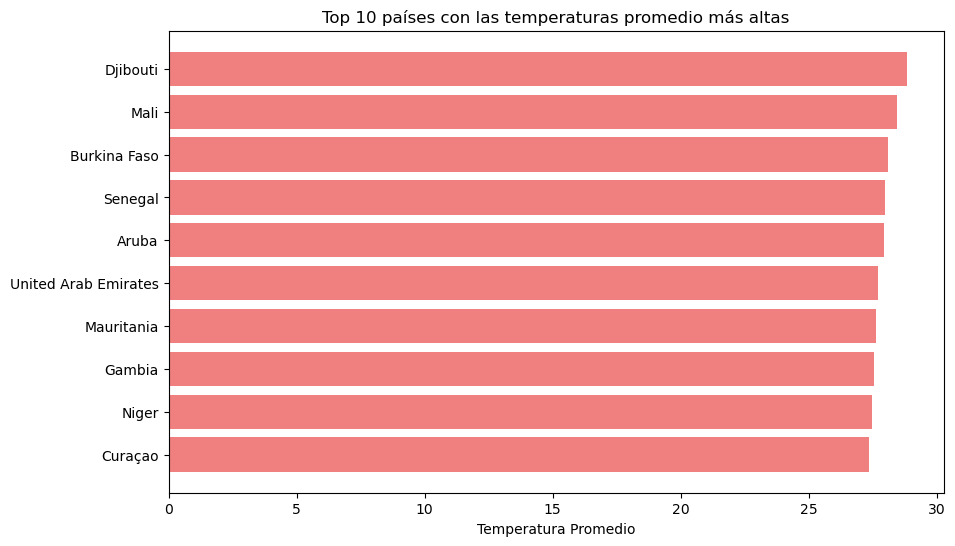

In [12]:
import matplotlib.pyplot as plt

# Ordenamos la base por temperatura promedio en orden ascendente
df_sorted = avg_temp.sort_values(by='AverageTemperature')

# Luego obtenemos los 10 países con las temperaturas más bajas y las 10 con las más altas
top_10_highest = df_sorted.tail(10)
top_10_lowest = df_sorted.head(10)

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_10_highest['Country'], top_10_highest['AverageTemperature'], color='lightcoral')
plt.xlabel('Temperatura Promedio')
plt.title('Top 10 países con las temperaturas promedio más altas')
plt.show()


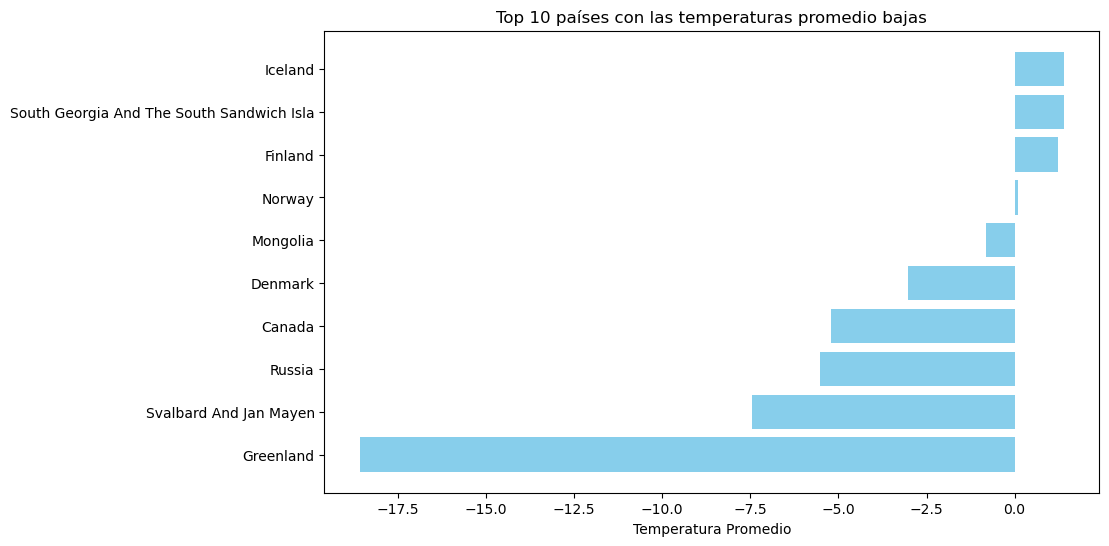

In [13]:
# Ahora los 10 países con las temperaturas más bajas

plt.figure(figsize=(10, 6))
plt.barh(top_10_lowest['Country'], top_10_lowest['AverageTemperature'], color='skyblue' )
plt.xlabel('Temperatura Promedio')
plt.title('Top 10 países con las temperaturas promedio bajas') 
plt.show()


### Gráfico de dispersión I

Ahora podemos hacer un gráfico con todos los países. 

**México** se encuentra de color <span style="color:blue">azul</span>.


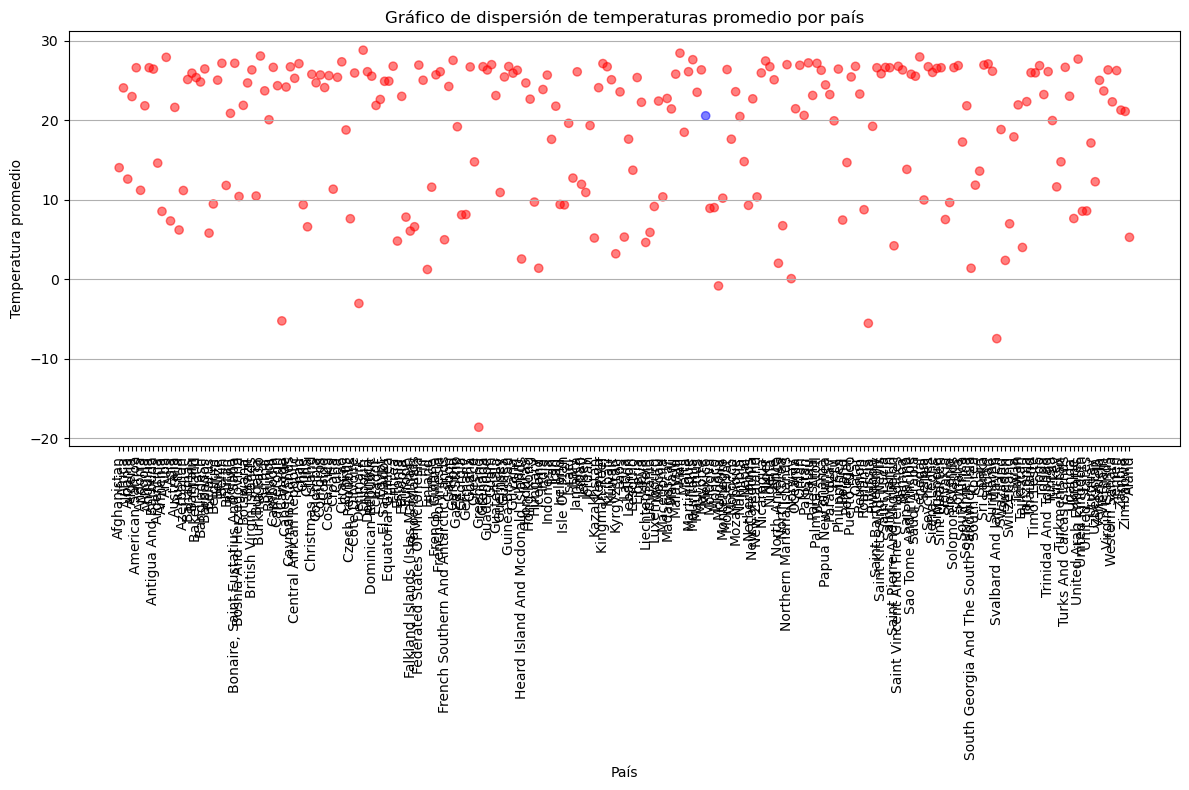

In [14]:
# Ponerle color azul para México

colors = ['red' if country != 'Mexico' else 'blue' for country in avg_temp['Country']]

plt.figure(figsize=(12, 8))
plt.scatter(avg_temp['Country'], avg_temp['AverageTemperature'], c=colors, alpha=0.5)
plt.xlabel('País')
plt.ylabel('Temperatura promedio')
plt.title('Gráfico de dispersión de temperaturas promedio por país')
plt.xticks(rotation=90)  
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Gráfico de dispersión II

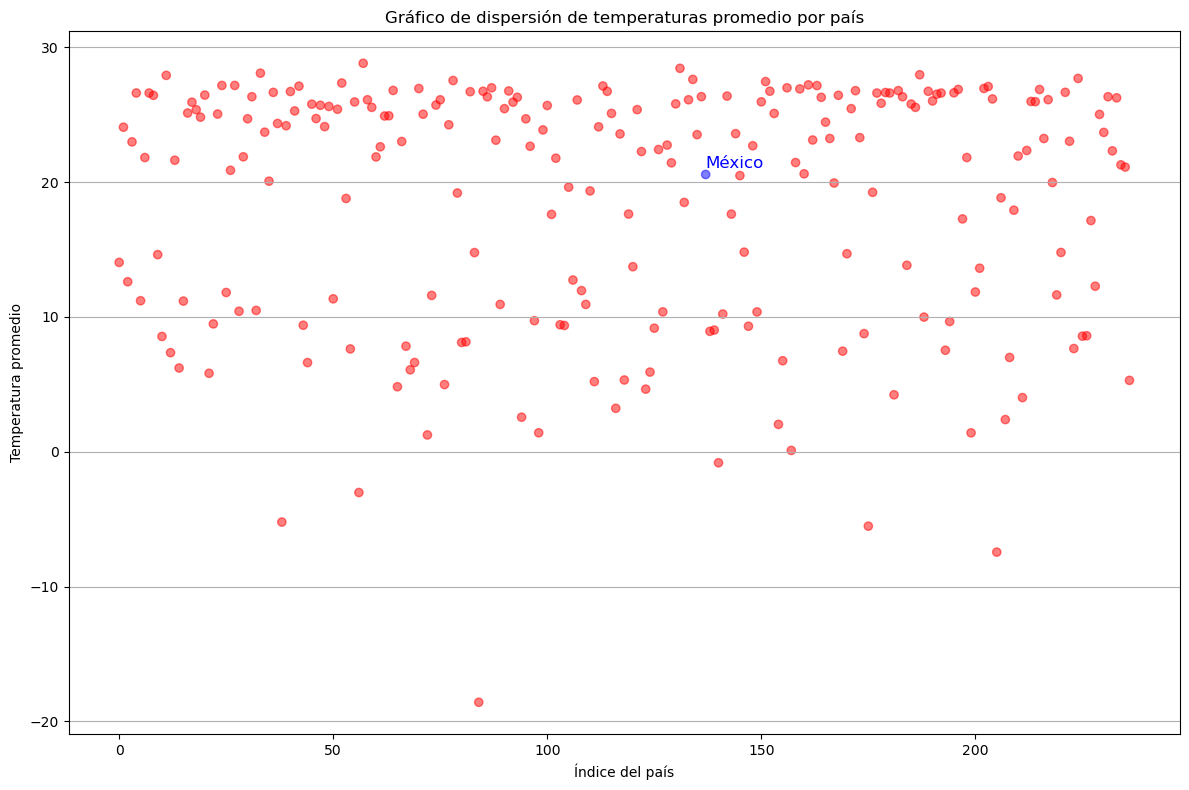

In [15]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(avg_temp.index, avg_temp['AverageTemperature'], c=colors, alpha=0.5)
plt.xlabel('Índice del país')
plt.ylabel('Temperatura promedio')
plt.title('Gráfico de dispersión de temperaturas promedio por país')
plt.grid(True, axis='y')
plt.tight_layout()

# Encontrar el índice de México
mexico_index = avg_temp[avg_temp['Country'] == 'Mexico'].index[0]

# Añadir una etiqueta para México
plt.text(mexico_index, avg_temp.loc[mexico_index, 'AverageTemperature'] + 0.5, 'México', color='blue', fontsize=12)

plt.show()

### Mapa de temperatura promedio

In [16]:
# Hacemos un mapa de choropleth

# Tenemos que importar otras cosas para que jale bien
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [17]:
# Para el mapa

fig = px.choropleth(avg_temp, locations = "Country", locationmode="country names", color = "AverageTemperature")
fig.update_layout(title = "Mapa tipo Choropleth de la\ntemperatura promedio")
fig.show()

## Análisis de síntomas de calentamiento global

En esta parte vamos a graficar la temperatura promedio desde el inicio de los registros y lo que haremos es calcular un intervalo de confianza con una variable que se llama `LandAverageTemperatureUncertainty`.

In [18]:
# Leemos nuevos datos también de kaggle

global_temp=pd.read_csv("GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Analizar la columna de fecha

global_temp["dt"][0].split("-")[0]

'1750'

In [20]:
# Hacemos una función para extraer el año

def fetch_year(date):
    return date.split("-")[0]

In [21]:
# Lo aplicamos en toda la base en una nueva columna "years"
# Ojo: está hasta el final

global_temp["years"] = global_temp["dt"].apply(fetch_year)
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [22]:
# Vemos la temperatura agregada por año:

data = global_temp.groupby("years").agg({"LandAverageTemperature":"mean","LandAverageTemperatureUncertainty":"mean"}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [23]:
# Ahora tenemos que crear dos columnas adicionales utilizando la variable de temperatura promedio y la de incertidumbre

data["Uncertainity Top"] = data["LandAverageTemperature"] + data["LandAverageTemperatureUncertainty"]
data["Uncertainity Bottom"] = data["LandAverageTemperature"] - data["LandAverageTemperatureUncertainty"]
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity Top,Uncertainity Bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [24]:
# Cambiamos los nombres de las columnas

nuevas_cols = {
    'years': 'Año',
    'LandAverageTemperature': 'Temperatura promedio de tierra',
    'LandAverageTemperatureUncertainty': 'Incertidumbre',
    'Uncertainity Top': 'Cota superior',
    'Uncertainity Bottom': 'Cota inferior'
}

data2 = data.rename(columns=nuevas_cols)

data2.head()

,Año,Temperatura promedio de tierra,Incertidumbre,Cota superior,Cota inferior
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [25]:
# Hacemos un lineplot

fig=px.line(data2, x="Año", y=['Temperatura promedio de tierra', 'Cota superior', 'Cota inferior'], 
        title = "Temperatura promedio de la tierra")
fig.show()

### Visualizamos la temperatura promedio en cada estación

Ahora veremos cómo es la dinámica de la temperatura para cada estación del año.

Para esto necesitamos crear una columna categórica en donde, según el mes del año, se vincule con una estación (primavera, verano, otoño o invierno).

In [26]:
# Volvamos a ver los datos que tenemos

global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [27]:
# Necesitamos la columna de "season" o estacion pero no la tenemos
# Para ello extraemos el mes de "dt" y con eso podemos crear la estacionalidad

# Primero vemos que tipo de variable es:

global_temp["dt"].dtype

dtype('O')

In [28]:
# Lo convertimos a fecha

global_temp["dt"]=pd.to_datetime(global_temp["dt"])
global_temp["dt"].head()

0   1750-01-01
1   1750-02-01
2   1750-03-01
3   1750-04-01
4   1750-05-01
Name: dt, dtype: datetime64[ns]

In [29]:
# Generamos la columna de mes

global_temp["month"]=global_temp["dt"].dt.month
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [30]:
# Definimos nuestra propia función para generar las estaciones

def get_season(month):
    if month >= 3 and month <= 5:
        return "spring"
    elif month >= 6 and month <= 8:
        return "summer"
    elif month >= 9 and month <=11:
        return "autumn"
    else:
        return "winter"


In [31]:
# La aplicamos:

global_temp["season"] = global_temp["month"].apply(get_season)
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [32]:
# Veamos valores unicos de años

years = global_temp["years"].unique()
#years

In [33]:
# Creamos listas vacias para guardar las temperaturas

spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [34]:
# Iteramos para generar los valores

for year in years:
    current_df=global_temp[global_temp["years"] == year]
    spring_temps.append(current_df[current_df["season"]=="spring"]["LandAverageTemperature"].mean())
    summer_temps.append(current_df[current_df["season"]=="summer"]["LandAverageTemperature"].mean())
    autumn_temps.append(current_df[current_df["season"]=="autumn"]["LandAverageTemperature"].mean())
    winter_temps.append(current_df[current_df["season"]=="winter"]["LandAverageTemperature"].mean())

In [35]:
# Podemos ver uno (solo los primeros 10 porque son un montón)

print(spring_temps[:10])

[8.563, 6.734999999999999, 7.035499999999999, 8.627333333333334, 9.074333333333334, 8.583666666666666, 9.466, 8.604666666666667, 6.896666666666666, 6.897333333333333]


In [36]:
# Creamos una nueva base con las variables creadas

season=pd.DataFrame()

In [37]:
# Le agregamos las variables de año y de cada estación

season["Año"]=years
season["Primavera"]=spring_temps
season["Verano"]=summer_temps
season["Otoño"]=autumn_temps
season["Invierno"]=winter_temps
season.head()

,Año,Primavera,Verano,Otoño,Invierno
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [38]:
# Ahora si podemos hacer la visualización

fig=px.line(season, x="Año", y=['Primavera', 'Verano', 'Otoño', 'Invierno'],
       title = "Temperatura promedio por estación")
fig.show()

### Análisis de las temperaturas de ciertos países

Ahora, se hará un análisis para una muestra de países, incluyendo **México** para ponerlo en perspectiva.

In [39]:
# Veamos qué países tenemos
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
     

In [40]:
# Establecemos los paises

pais = ["Mexico", "Russia", "United States", "China", "Japan", "Australia"]

In [41]:
# Vemos la base de datos que ya teníamos

global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [42]:
# Creamos un filtro de los países que habíamos seleccionado

global_temp_country[global_temp_country["Country"].isin(pais)].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [43]:
# Lo guardamos en una base nueva

continent_df = global_temp_country[global_temp_country["Country"].isin(pais)]
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [44]:
# Volvemos a sacar los años utilizando la funcion que habíamos creado

continent_df["years"] = continent_df["dt"].apply(fetch_year)

# Ignorar el warning que probablemente tiene que ver con Anaconda

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\234671998.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Debido a que tenemos que analizar la tendencia en estos países, necesitamos: year, country y temperatures

avg_temp = continent_df.groupby(["years","Country"]).agg({"AverageTemperature":"mean"}).reset_index()
avg_temp.head()

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000


In [46]:
# Ahora sí, ya podemos hcer la función

fig = px.line(avg_temp, x = "years", y = "AverageTemperature", color = "Country",
       title = "Temperatura promedio por muestra de países")
fig.show()

### También podemos hacer un análisis de exploración espacial


In [47]:
# Leemos nuevos datos de kaggle

global_temp_state = pd.read_csv("GlobalLandTemperaturesByState.csv")
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [48]:
# ¿Qué países incluye esta base?

global_temp_state["Country"].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [49]:
# Vamos a seleccionar solo para los USA

filter = global_temp_state["Country"] == "United States"
USA = global_temp_state[filter]
USA.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [50]:
# Quitamos missing values

USA.dropna(inplace=True)

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\3594284283.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# Veamos los valores que tenemos de estados

USA["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [52]:
# Hacemos unas modificaciones para simplificar

state = {"Georgia (State)":"Georgia", "District Of Columbia":"Columbia"}

In [53]:
# Lo probamos

USA["State"].replace(state)

7458      Alabama
7463      Alabama
7464      Alabama
7465      Alabama
7466      Alabama
           ...   
626435    Wyoming
626436    Wyoming
626437    Wyoming
626438    Wyoming
626439    Wyoming
Name: State, Length: 141930, dtype: object

In [54]:
# Lo cambiamos para siempre con inplace

# Puede volver a salir warning

USA["State"].replace(state, inplace=True)

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\2781523445.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
# Necesitamos la columna de avg temp y state unicamente

USA = USA[["AverageTemperature", "State"]]
USA.head()

,AverageTemperature,State
7458,10.722,Alabama
7463,19.075,Alabama
7464,21.197,Alabama
7465,25.290,Alabama
7466,26.420,Alabama


In [56]:
# Ahora tenemos que agrupar por estados

USA_temp = USA.groupby("State")["AverageTemperature"].mean().reset_index()
USA_temp.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [57]:
# Para plotear necesitamos las coordenadas
# Necesitamos la librería de opencage

!pip install opencage

In [58]:
# Ahora descargamos un geocoder

from opencage.geocoder import OpenCageGeocode

Para más información sobre la API key (hay una opción de prueba gratuita):

* https://pypi.org/project/opencage/
* https://opencagedata.com/pricing

In [59]:
# Necesitamos establecer una conexión con APIs

key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
geocoder = OpenCageGeocode(key)

In [60]:
# Ejemplo de uso

location = "Guadalajara,Mexico"
results = geocoder.geocode(location)

results


[{'annotations': {'DMS': {'lat': "20° 40' 19.33500'' N",
    'lng': "103° 20' 18.22560'' W"},
   'MGRS': '13QFC7308186737',
   'Maidenhead': 'DL80hq91jg',
   'Mercator': {'x': -11503577.622, 'y': 2337737.999},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=5605820#map=17/20.67204/-103.33840',
    'note_url': 'https://www.openstreetmap.org/note/new#map=17/20.67204/-103.33840&layers=N',
    'url': 'https://www.openstreetmap.org/?mlat=20.67204&mlon=-103.33840#map=17/20.67204/-103.33840'},
   'UN_M49': {'regions': {'AMERICAS': '019',
     'CENTRAL_AMERICA': '013',
     'LATIN_AMERICA': '419',
     'MX': '484',
     'WORLD': '001'},
    'statistical_groupings': ['LEDC']},
   'callingcode': 52,
   'currency': {'alternate_symbols': ['MEX$'],
    'decimal_mark': '.',
    'disambiguate_symbol': 'MEX$',
    'html_entity': '$',
    'iso_code': 'MXN',
    'iso_numeric': '484',
    'name': 'Mexican Peso',
    'smallest_denomination': 5,
    'subunit': 'Centavo',
    'subunit_to

In [61]:
# Hasta abajo hay información de geometry, y es la que debemos extraer

results[0]["geometry"]["lng"]
results[0]["geometry"]["lat"]

20.6720375

In [62]:
# Ahora si lo hacemos para USA con listas

list_lat=[]
list_lon=[]

for state in USA_temp["State"]:
    results=geocoder.geocode(state)
    lat = results[0]["geometry"]["lat"]
    lon = results[0]["geometry"]["lng"]
    
    # Hacemos un append en las listas
    list_lat.append(lat)
    list_lon.append(lon)
    

In [63]:
# Lo pegamos al DataFrame 

USA_temp["lat"]=list_lat
USA_temp["lon"]=list_lon
USA_temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [64]:
# YA está listo el dataframe
# Vamos a hacer un heatmap

# Importamos folium

import folium
from folium.plugins import HeatMap

In [65]:
# Un ejemplo de folium 

# El 37 y -95 son las coordenadas centrales de USA para poder iniciar el mapa centrado en USA

basemap = folium.Map(location=[37, -95], zoom_start=4)
basemap

In [66]:
# Las variables que necesitamos para plotear

vars = USA_temp[["lat","lon","AverageTemperature"]]
vars.head()

,lat,lon,AverageTemperature
0,33.258882,-86.829534,17.066138
1,64.445961,-149.680909,-4.890738
2,34.395342,-111.763275,15.381526
3,35.204888,-92.447911,15.573963
4,36.701463,-118.755997,14.327677


In [67]:
# Pasamos estas variables al heatmap

HeatMap(vars).add_to(basemap)
basemap

### Caso mexicano

En esta última parte haremos un análisis exploratorio sobre las temperaturas de ciertas ciudades mexicanas.

In [68]:
# Abrimos los datos

cities=pd.read_csv("GlobalLandTemperaturesByCity.csv")
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [69]:
# Solo queremos datos para Mexico "Country"

Mex=cities[cities["Country"]=="Mexico"]
Mex.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
58170,1843-03-01,24.008,2.048,Acapulco,Mexico,16.87N,100.47W
58171,1843-04-01,NaN,NaN,Acapulco,Mexico,16.87N,100.47W
58172,1843-05-01,NaN,NaN,Acapulco,Mexico,16.87N,100.47W
58173,1843-06-01,NaN,NaN,Acapulco,Mexico,16.87N,100.47W
58174,1843-07-01,NaN,NaN,Acapulco,Mexico,16.87N,100.47W


In [70]:
# Shape
Mex.shape

(209560, 7)

In [71]:
# Veamos las ciudades

Mex["City"].unique()

array(['Acapulco', 'Acuña', 'Aguascalientes', 'Apodaca', 'Córdoba',
       'Campeche', 'Cancún', 'Carmen', 'Celaya', 'Chalco', 'Chetumal',
       'Chihuahua', 'Chilpancingo', 'Chimalhuacán', 'Ciudad Valles',
       'Coacalco', 'Coatzacoalcos', 'Colima', 'Cuautitlán Izcalli',
       'Cuautla', 'Cuernavaca', 'Culiacán', 'Delicias', 'Durango',
       'Ecatepec', 'Ensenada', 'Fresnillo', 'Gómez Palacio',
       'Garza García', 'General Escobedo', 'Guadalajara', 'Guadalupe',
       'Guaymas', 'Hermosillo', 'Huixquilucan', 'Iguala', 'Irapuato',
       'Ixtapaluca', 'Jiutepec', 'Juarez', 'López Mateos', 'La Paz',
       'León', 'Los Mochis', 'Los Reyes', 'Mérida', 'Manzanillo',
       'Matamoros', 'Mazatlán', 'Metepec', 'Mexicali', 'Mexico',
       'Minatitlán', 'Monclova', 'Monterrey', 'Morelia', 'Naucalpan',
       'Nezahualcóyotl', 'Nicolás Romero', 'Oaxaca', 'Obregon', 'Orizaba',
       'Pachuca', 'Piedras Negras', 'Puebla', 'Puerto Vallarta',
       'Querétaro', 'Reynosa', 'Salamanca', '

In [72]:
# Solo quermos algunas

mex_cities=['Guadalajara', 'Juarez', 'La Paz', 'Mexico', 'Monterrey', 
            'Morelia', 'Oaxaca', 'Querétaro', 'Saltillo', 'Tijuana',
            'Toluca', 'Veracruz', 'Zacatecas']


In [73]:
# Usamos el filtro

cities = Mex[Mex["City"].isin(mex_cities)]
cities

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2673899,1838-01-01,14.802,2.640,Guadalajara,Mexico,20.09N,104.08W
2673900,1838-02-01,16.121,1.949,Guadalajara,Mexico,20.09N,104.08W
2673901,1838-03-01,18.434,1.838,Guadalajara,Mexico,20.09N,104.08W
2673902,1838-04-01,20.618,1.566,Guadalajara,Mexico,20.09N,104.08W
2673903,1838-05-01,21.152,1.371,Guadalajara,Mexico,20.09N,104.08W
...,...,...,...,...,...,...,...
8472465,2013-05-01,19.800,0.379,Zacatecas,Mexico,23.31N,102.23W
8472466,2013-06-01,20.594,0.416,Zacatecas,Mexico,23.31N,102.23W
8472467,2013-07-01,18.957,0.552,Zacatecas,Mexico,23.31N,102.23W
8472468,2013-08-01,18.987,0.433,Zacatecas,Mexico,23.31N,102.23W


In [74]:
# Quitamos la N y W de latitude y longitude

cities["Latitude"]=cities["Latitude"].str.strip("N")
cities["Longitude"]=cities["Longitude"].str.strip("W")
cities.head()

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\1568965843.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\1568965843.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2673899,1838-01-01,14.802,2.640,Guadalajara,Mexico,20.09,104.08
2673900,1838-02-01,16.121,1.949,Guadalajara,Mexico,20.09,104.08
2673901,1838-03-01,18.434,1.838,Guadalajara,Mexico,20.09,104.08
2673902,1838-04-01,20.618,1.566,Guadalajara,Mexico,20.09,104.08
2673903,1838-05-01,21.152,1.371,Guadalajara,Mexico,20.09,104.08


In [75]:
# Convertir la columna de Longitude en tipo numérico
cities["Longitude"] = cities["Longitude"].astype(float)

# Multiplicar la columna de Longitude por -1 para hacerla negativa
# Esto es necesario porque si no, va a pensar que estamos en China jaja

cities["Longitude"] = -1 * cities["Longitude"]

cities.head()

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\1814724251.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\1814724251.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2673899,1838-01-01,14.802,2.640,Guadalajara,Mexico,20.09,-104.08
2673900,1838-02-01,16.121,1.949,Guadalajara,Mexico,20.09,-104.08
2673901,1838-03-01,18.434,1.838,Guadalajara,Mexico,20.09,-104.08
2673902,1838-04-01,20.618,1.566,Guadalajara,Mexico,20.09,-104.08
2673903,1838-05-01,21.152,1.371,Guadalajara,Mexico,20.09,-104.08


In [76]:
# Necistamos el mes porque el análisis es mensual. Lo tenemos que sacar de dt

# Primero declaramos como date la variable:

cities["dt"]=pd.to_datetime(cities["dt"])

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\3754080407.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
# Ahora sí, extraemos el mes y lo guardamos como otra variable

cities["Month"]=cities["dt"].dt.month
cities.head()

C:\Users\Daniel.Isita\AppData\Local\Temp\ipykernel_20944\1884809367.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
2673899,1838-01-01,14.802,2.640,Guadalajara,Mexico,20.09,-104.08,1
2673900,1838-02-01,16.121,1.949,Guadalajara,Mexico,20.09,-104.08,2
2673901,1838-03-01,18.434,1.838,Guadalajara,Mexico,20.09,-104.08,3
2673902,1838-04-01,20.618,1.566,Guadalajara,Mexico,20.09,-104.08,4
2673903,1838-05-01,21.152,1.371,Guadalajara,Mexico,20.09,-104.08,5


In [78]:
# Agrupamos por mes y ciudad

cities_temp=cities.groupby(["Month", "City"])["AverageTemperature"].mean().to_frame().reset_index()
cities_temp.head()

,Month,City,AverageTemperature
0,1,Guadalajara,17.503988
1,1,Juarez,5.223539
2,1,La Paz,19.560230
3,1,Mexico,12.218318
4,1,Monterrey,13.222968


In [79]:
# Cambiamos el nombre de las columnas

cities_temp.columns = ["month", "City", "Mean_temp"]
cities_temp.head()

,month,City,Mean_temp
0,1,Guadalajara,17.503988
1,1,Juarez,5.223539
2,1,La Paz,19.560230
3,1,Mexico,12.218318
4,1,Monterrey,13.222968


In [80]:
# Nuevamente necesitamos las coordenadas con un merge

df = cities_temp.merge(cities, on="City")
df.head()

,month,City,Mean_temp,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Guadalajara,17.503988,1838-01-01,14.802,2.640,Mexico,20.09,-104.08,1
1,1,Guadalajara,17.503988,1838-02-01,16.121,1.949,Mexico,20.09,-104.08,2
2,1,Guadalajara,17.503988,1838-03-01,18.434,1.838,Mexico,20.09,-104.08,3
3,1,Guadalajara,17.503988,1838-04-01,20.618,1.566,Mexico,20.09,-104.08,4
4,1,Guadalajara,17.503988,1838-05-01,21.152,1.371,Mexico,20.09,-104.08,5


In [81]:
# Tenemos varios duplicados que vamos a quitar

data = df.drop_duplicates(subset = ["month", "City"])
data.head()

,month,City,Mean_temp,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Guadalajara,17.503988,1838-01-01,14.802,2.64,Mexico,20.09,-104.08,1
2109,2,Guadalajara,18.511743,1838-01-01,14.802,2.64,Mexico,20.09,-104.08,1
4218,3,Guadalajara,19.895608,1838-01-01,14.802,2.64,Mexico,20.09,-104.08,1
6327,4,Guadalajara,21.427412,1838-01-01,14.802,2.64,Mexico,20.09,-104.08,1
8436,5,Guadalajara,23.066382,1838-01-01,14.802,2.64,Mexico,20.09,-104.08,1


In [82]:
# Nos quedamos solo con algunas variables 

data2 = data[["month", "City", "Mean_temp", "Country", "Latitude", "Longitude"]]
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Guadalajara,17.503988,Mexico,20.09,-104.08
2109,2,Guadalajara,18.511743,Mexico,20.09,-104.08
4218,3,Guadalajara,19.895608,Mexico,20.09,-104.08
6327,4,Guadalajara,21.427412,Mexico,20.09,-104.08
8436,5,Guadalajara,23.066382,Mexico,20.09,-104.08


### HeatMap de temperaturas por ciudad en México

In [83]:
# Importamos nuevas funciones para el heatmap

import plotly.graph_objs as go

In [84]:
# Guardamos un nuevo objeto para el plot

data=[go.Heatmap(x=data2["month"],
                y=data2["City"],
                z=data2["Mean_temp"])]

In [85]:
# Necesitamos un layout para el plot

layout=go.Layout(title = "Temperatura de ciudades por mes")

In [86]:
# Ahora sí

fig=go.Figure(data=data, layout=layout)
fig.show()

### Mapas de temperaturas en México

Por último creamos un mapa que tenga etiquetas de la temperatura promedio por ciudad

In [87]:
# Veamos como esta nuestro basemap con las coordenadas de México

basemap = folium.Map(location=[21.8, -102], zoom_start=5)
basemap

In [88]:
# Veamos lo que tiene data2

data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Guadalajara,17.503988,Mexico,20.09,-104.08
2109,2,Guadalajara,18.511743,Mexico,20.09,-104.08
4218,3,Guadalajara,19.895608,Mexico,20.09,-104.08
6327,4,Guadalajara,21.427412,Mexico,20.09,-104.08
8436,5,Guadalajara,23.066382,Mexico,20.09,-104.08


In [89]:
# Otra forma de ver el contenido:

for id,row in data2.iterrows():
    print(id)
    print(row)

0
month                  1
City         Guadalajara
Mean_temp      17.503988
Country           Mexico
Latitude           20.09
Longitude        -104.08
Name: 0, dtype: object
2109
month                  2
City         Guadalajara
Mean_temp      18.511743
Country           Mexico
Latitude           20.09
Longitude        -104.08
Name: 2109, dtype: object
4218
month                  3
City         Guadalajara
Mean_temp      19.895608
Country           Mexico
Latitude           20.09
Longitude        -104.08
Name: 4218, dtype: object
6327
month                  4
City         Guadalajara
Mean_temp      21.427412
Country           Mexico
Latitude           20.09
Longitude        -104.08
Name: 6327, dtype: object
8436
month                  5
City         Guadalajara
Mean_temp      23.066382
Country           Mexico
Latitude           20.09
Longitude        -104.08
Name: 8436, dtype: object
10545
month                  6
City         Guadalajara
Mean_temp      23.506023
Country           Me

In [90]:
# Haemos el primer mapa

for id,row in data2.iterrows():
    folium.Marker(location=[row["Latitude"],row["Longitude"]],popup=row["Mean_temp"]).add_to(basemap)
    
basemap

In [91]:
# Camiamos los pop ups (etiquetas)

for id, row in data2.iterrows():
    popup_content = f"City: {row['City']}<br>Country: {row['Country']}<br>Mean Temperature: {row['Mean_temp']:.2f}"
    folium.Marker(location=[row["Latitude"], row["Longitude"]], popup=popup_content).add_to(basemap)

basemap

In [92]:
# Una configuración adicional

from folium import Popup

for id, row in data2.iterrows():
    popup_content = f"City: {row['City']}<br>Country: {row['Country']}<br>Mean Temperature: {row['Mean_temp']:.2f}"
    custom_popup = Popup(popup_content, max_width=300)
    folium.Marker(location=[row["Latitude"], row["Longitude"]], popup=custom_popup).add_to(basemap)

basemap

## 4. Comentarios adicionales

* EDA un proceso iterativo:
    - esto debido a que mientras vamos realizando el análisis nos damos cuenta de diversas situaciones o acciones que pueden mejorar nuestra base de datos, como limpiar alguna variable, transformar una variable ya sea en variables numéricas, categóricas o agrupándolas, y mientras más entendamos la base de datos será más fácil trabajar con ellas y realizar mejoras.
    - Tener cuidado ⚠️ porque, el EDA al ser un proceso iterativo, podemos "envolvernos" en este proceso y utilizar más tiempo del necesario en esta etapa, lo cual podría tener un impacto en el tiempo de entrega del proyecto.
* Además, dependiendo del objetivo del proyecto, se pueden integrar varias bases de datos que se complementen. Por ejemplo, en la base de datos que trabajamos con información de precios de productos básicos de Pakistán, se podría integrar:
    - información macroeconómica para ver si estos precios tienen efecto en la economía del país (duuuh, claro!),
    - información meteorológica para comparar si los precios se vieron afectados por lluvia, sequía, terremotos, ...
    - bases de datos de inseguridad y de desempleo para identificar si tuvo efectos sociales,
    - bases de datos demográficas para identificar los movimientos en precios afectaron las tasas de nacimientos o mortalidad, etc.

## 5. Referencias

* Victor Cuspinera: https://github.com/vcuspinera/UDG_MCD_Project_Dev_I/blob/main/actividades/13_EDA.ipynb
* Victor Cuspinera: https://github.com/vcuspinera/UDG_MCD_Project_Dev_I/tree/main/proyectos/eda
* UDEMY: https://www.udemy.com/course/spatial-data-science-in-python/
* Kaggle: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data